# ニューラルネットワーク

分類問題では、neural_network.MLPClassifier()を利用し、  
回帰問題ではneural_network.MLPRegressor()を利用します。

In [2]:
from sklearn.neural_network import MLPClassifier  # 分類
from sklearn.neural_network import MLPRegressor # 回帰

# ニューラルネットワーク＜分類＞

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# データ取得
iris = load_iris()
x, y = iris.data, iris.target

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# solverには確率的勾配降下法(sgd)やadamなどが利用可能です。
model = MLPClassifier(solver="sgd", random_state=0, max_iter=3000)

# 学習
model.fit(x_train, y_train)
pred = model.predict(x_test)

# 予測精度
print("train_result: ", model.score(x_train, y_train))
print("test_result: ", model.score(x_test, y_test))
print(classification_report(y_test, pred))

train_result:  0.9809523809523809
test_result:  0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# ニューラルネットワーク＜回帰＞

0.25693747138244105


c:\users\haruk\anaconda3\envs\dev\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


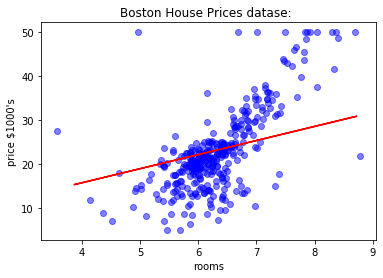

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

boston = load_boston()

X = boston.data[:, 5].reshape(-1, 1)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = MLPRegressor(random_state=0)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

result = model.predict(X_test)

plt.scatter(X_train, y_train, c="b", alpha=0.5)
plt.plot(X_test, result, c="r")
plt.title("Boston House Prices datase: ")
plt.xlabel("rooms")
plt.ylabel("price $1000's")
plt.show()

# データの標準化

標準化とは元のデータの平均を0、標準偏差が1のものへと変換する正規化法のことを指します。  
標準化を行うには、sklearn.preprocessingのStandardScaler関数を使います。

In [6]:
# データの標準化を行うために必要
from sklearn.preprocessing import StandardScaler

In [7]:
# データの標準化を行うために必要
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# データ取得
iris = load_iris()
x, y = iris.data, iris.target

# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
scaler.fit(x_train)

# 標準化
X_train_scaled = scaler.transform(x_train)
X_test_scaled  = scaler.transform(x_test)

import scipy
std = scipy.std(X_train_scaled, axis=0) # 訓練データの説明変数の標準偏差が1になっているか確認
print(std)

# 入力層・隠れ層・出力層合わせて4層のニューラルネットワークを実装 (隠れ層が2層で各々の隠れ層には100個のニューロンを設定)
# alpha=0.07で正則化の強度の指定
# max_iter=10000は最大繰り返し回数
# 活性化関数はReLUがでフォルダで、パラメタの推定アルゴリズムにはAdamがデフォルト
model = MLPClassifier(hidden_layer_sizes=(100,100), alpha=0.07, 
                     max_iter=10000, random_state=0)
model.fit(X_train_scaled, y_train)
print("訓練データ: ", model.score(X_train_scaled, y_train))
print("テストデータ: ", model.score(X_test_scaled, y_test))

[1. 1. 1. 1.]
訓練データ:  1.0
テストデータ:  0.9777777777777777
